Multiple Linear Regression

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
df = pd.read_csv("50_Startups.csv")

In [103]:
X = df[["R&D Spend", "Administration", "Marketing Spend", "State"]]
y = df[["Profit"]]

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [105]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ["State"])], remainder='passthrough')

In [106]:
X = pd.DataFrame(ct.fit_transform(X))

In [107]:
X.columns = ["State1", "State2", "State3", "RnD", "Admin", "Market"]

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
# alondopontovos trained the model without having feature scaled

from sklearn.preprocessing import StandardScaler

In [36]:
X_train[["RnD", "Admin", "Market"]] = StandardScaler().fit_transform(X_train[["RnD", "Admin", "Market"]])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/rajdeep/.local/lib/python3.6/site-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/rajdeep/.local/lib/python3.6/site-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [38]:
X_test[["RnD", "Admin", "Market"]] = StandardScaler().fit_transform(X_test[["RnD", "Admin", "Market"]])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/rajdeep/.local/lib/python3.6/site-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/rajdeep/.local/lib/python3.6/site-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
y_pred = LinearRegression().fit(X_train, y_train).predict(X_test)

In [112]:
y_pred

array([[103015.20159795],
       [132582.27760816],
       [132447.73845175],
       [ 71976.09851258],
       [178537.48221057],
       [116161.24230167],
       [ 67851.69209676],
       [ 98791.73374687],
       [113969.43533014],
       [167921.06569552]])

In [113]:
y_test

,Profit
28,103282.38
11,144259.40
10,146121.95
41,77798.83
2,191050.39
27,105008.31
38,81229.06
31,97483.56
22,110352.25
4,166187.94


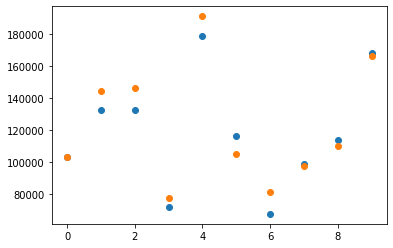

In [114]:
plt.scatter(range(len(X_test)), y_pred)
plt.scatter(range(len(X_test)), y_test)
plt.show()

In [115]:
abs(y_pred - y_test)

,Profit
28,267.178402
11,11677.122392
10,13674.211548
41,5822.731487
2,12512.907789
27,11152.932302
38,13377.367903
31,1308.173747
22,3617.185330
4,1733.125696
